In [1]:

import pandas as pd
from pathlib import Path
import json
dataset_path = Path("/mnt/i/bio/mave_curation/Erwood_BRCA2_HEK293T/")
assert dataset_path.exists()

In [2]:
data = pd.read_excel(dataset_path / 'raw' / '41587_2021_1201_MOESM3_ESM.xlsx', sheet_name='Supplementary Table 3',header=1)

In [3]:
data

,Protein Annotation,Wild type Base,Edited Base,CDS,Consequence,SPE Classification,Function Score,id,start,end,reference_base,alternate_base,refseq_id,Clinvar_SIG,CADD_phred,Unadjusted Function Score
0,T2515T,A,C,7545,synonymous,Functional,0.999369,chr13-32356536-32356537-A-C,32356536,32356537,A,C,BRCA2:NM_000059:exon15:c.A7545C:p.T2515T:Select,NaN,NaN,0.003596
1,T2515T,A,T,7545,synonymous,Functional,0.995782,chr13-32356536-32356537-A-T,32356536,32356537,A,T,BRCA2:NM_000059:exon15:c.A7545T:p.T2515T:Select,NaN,NaN,0.009437
2,T2515T,A,G,7545,synonymous,Functional,0.957546,chr13-32356536-32356537-A-G,32356536,32356537,A,G,BRCA2:NM_000059:exon15:c.A7545G:p.T2515T:Select,Likely_benign,NaN,0.108622
3,S2516T,T,A,7546,missense,Functional,1.006952,chr13-32356537-32356538-T-A,32356537,32356538,T,A,BRCA2:NM_000059:exon15:c.T7546A:p.S2516T:Select,NaN,26.20,-0.016045
4,S2516P,T,C,7546,missense,Functional,0.960612,chr13-32356537-32356538-T-C,32356537,32356538,T,C,BRCA2:NM_000059:exon15:c.T7546C:p.S2516P:Select,NaN,28.10,0.098578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,T1155T,T,C,3465,synonymous,Functional,0.984006,chr13-32337819-32337820-T-C,32337819,32337820,T,C,BRCA2:NM_000059:exon11:c.T3465C:p.T1155T:Select,Likely_benign,12.04,0.032910
422,T1155T,T,G,3465,synonymous,Functional,1.022418,chr13-32337819-32337820-T-G,32337819,32337820,T,G,BRCA2:NM_000059:exon11:c.T3465G:p.T1155T:Select,NaN,11.75,-0.047259
423,S1156T,T,A,3466,missense,Functional,1.041031,chr13-32337820-32337821-T-A,32337820,32337821,T,A,BRCA2:NM_000059:exon11:c.T3466A:p.S1156T:Select,NaN,16.72,-0.082471
424,S1156P,T,C,3466,missense,Functional,1.028343,chr13-32337820-32337821-T-C,32337820,32337821,T,C,BRCA2:NM_000059:exon11:c.T3466C:p.S1156P:Select,NaN,23.60,-0.055343


In [4]:
scoreset = pd.DataFrame.from_records(list(data.groupby("Protein Annotation")['Function Score'].agg('mean').items()),columns=['variant','score'])

In [5]:
from Bio.PDB.Polypeptide import protein_letters_3to1
protein_letters_1to3 = {v:k.title() for k,v in protein_letters_3to1.items()}
def clean(s):
    hgvs_pro = protein_letters_1to3[s[0]] + s[1:-1]
    if s[-1] == "*":
        hgvs_pro += "Ter"
    else:
        hgvs_pro += protein_letters_1to3[s[-1]]
    return "p."+ hgvs_pro

In [6]:
scoreset = scoreset.assign(hgvs_pro=scoreset.variant.apply(clean))

In [7]:
scoreset

,variant,score,hgvs_pro
0,A1896A,1.105465,p.Ala1896Ala
1,A1896E,1.116942,p.Ala1896Glu
2,A1896G,1.064648,p.Ala1896Gly
3,A1896V,1.087023,p.Ala1896Val
4,A392A,1.018658,p.Ala392Ala
...,...,...,...
326,V2652V,1.028852,p.Val2652Val
327,V388A,1.007652,p.Val388Ala
328,V388E,1.027413,p.Val388Glu
329,V388G,1.022345,p.Val388Gly


In [8]:
scoreset.to_csv(dataset_path / 'scoreset.csv',index=False)

<Axes: >

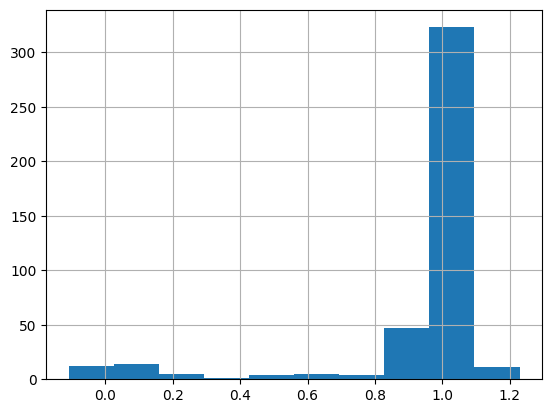

In [9]:
data.loc[:,'Function Score'].hist()

In [10]:
metadata = dict(uniprot_acc='P51587')
with open(dataset_path / 'metadata.json','w') as f:
    json.dump(metadata,f)